In [41]:
import pandas as pd

In [42]:
maneuvers = pd.read_csv("maneuvers.csv")
#maneuvers.head()

In [43]:
maneuvers.describe()

,t,x,y,z,dx,dy,dz,dv_vel,dv_st
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,2.160000e+02,2.160000e+02
mean,125.615959,-0.990419,0.000008,-0.000170,0.000004,-0.000044,-0.000004,-1.151982e-09,-1.341869e-09
std,73.030197,0.001023,0.003219,0.000710,0.002143,0.006613,0.001466,2.612847e-08,2.477499e-09
min,0.000000,-0.991665,-0.004521,-0.001121,-0.003245,-0.009033,-0.002051,-2.250000e-07,-7.812500e-09
25%,62.807980,-0.991449,-0.003222,-0.000867,-0.001985,-0.006502,-0.001476,-5.468750e-09,-2.734375e-09
50%,125.615950,-0.990581,0.000026,-0.000221,-0.000006,-0.000425,-0.000011,-7.812500e-10,-1.562500e-09
75%,188.423925,-0.989405,0.003226,0.000525,0.001938,0.006356,0.001461,3.125000e-09,0.000000e+00
max,251.231900,-0.988843,0.004521,0.000898,0.003245,0.009928,0.002051,1.750000e-07,3.906250e-09


Notice that dv_vel varies in the range -2e-7 to 1e-7, while dv_st varies in the range -7e-9 to 4e-9, so the MOST COSTLY maneuvers are much larger using CORRECTION_VEL method than using CORRECTION_ST !!

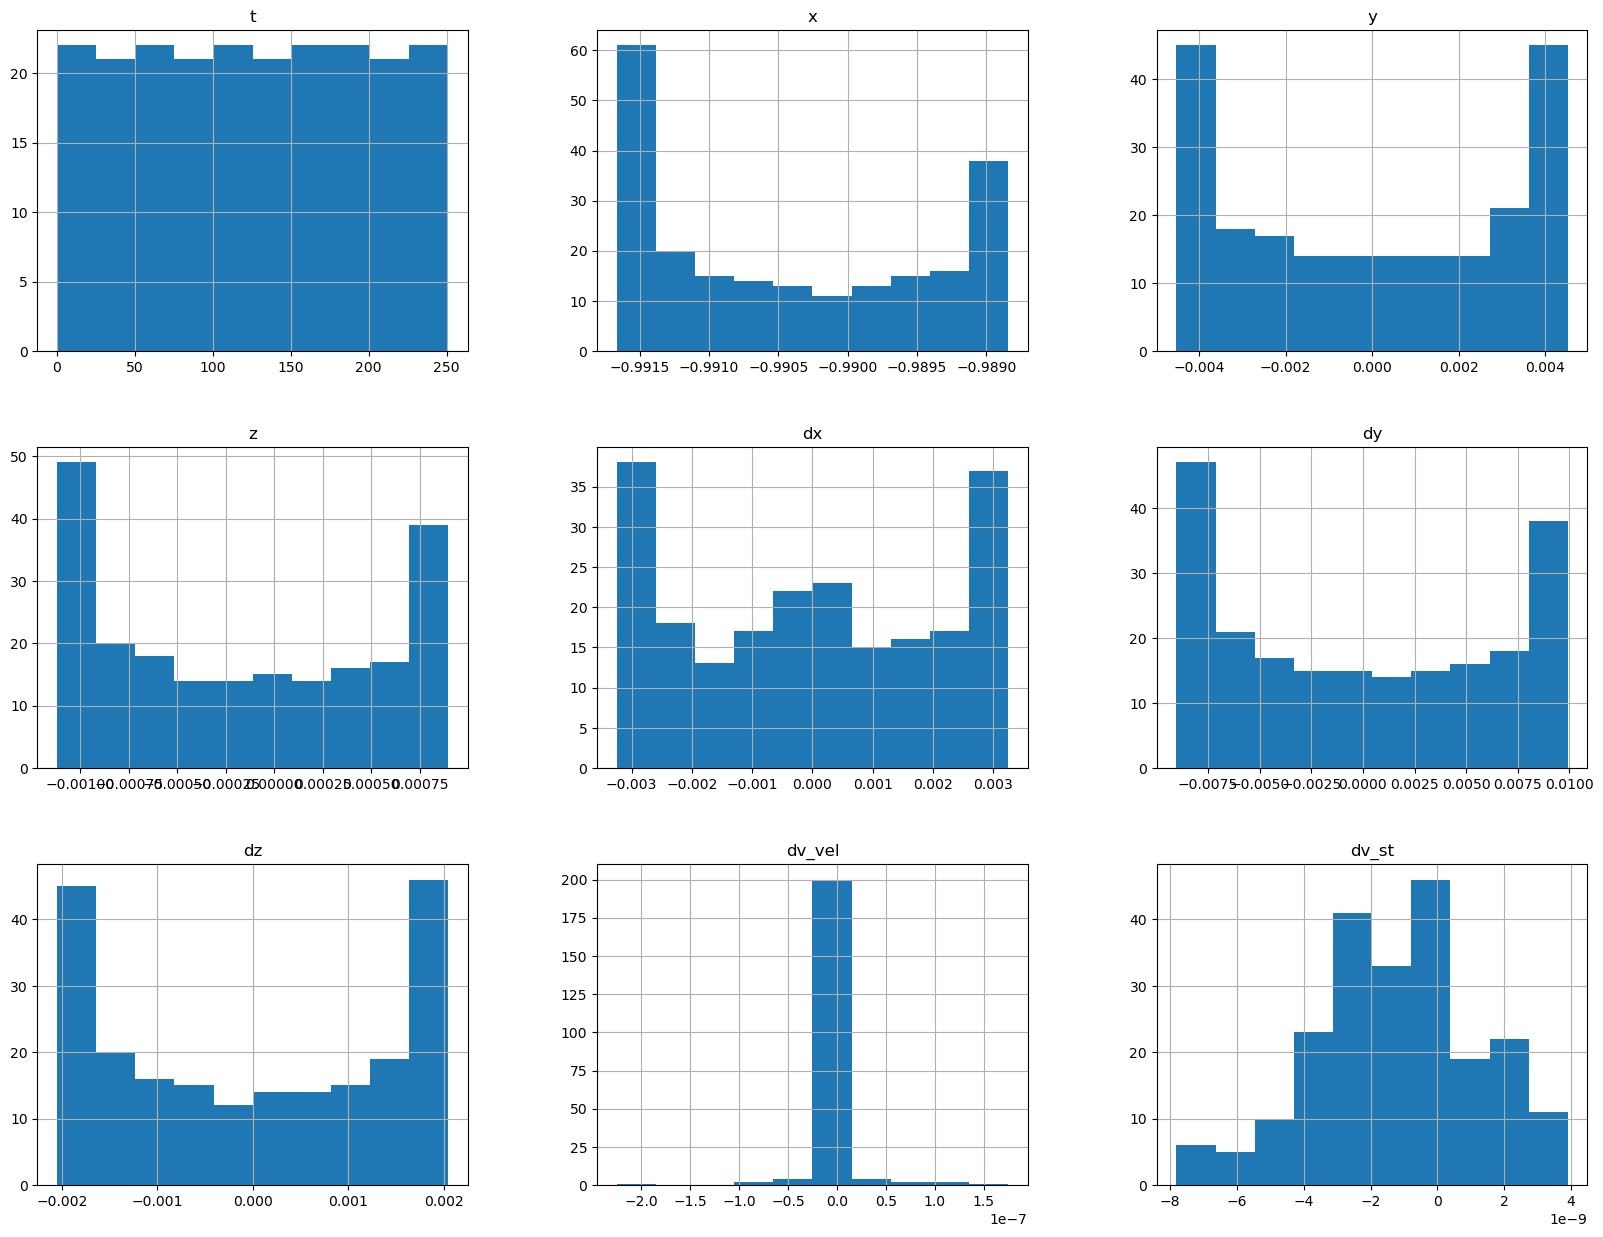

In [44]:
import matplotlib.pyplot as plt
maneuvers.hist(figsize=(20,15))
plt.show()

Histograms of attributes (x,y,z,dx,dy,dz) are tail heavy. We may need to transform to polar coords, or use time as extra attribute.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train_set, test_set = train_test_split(maneuvers, test_size=0.2, random_state=1)

In [47]:
# Let's create a copy of the training set and call it 'maneuvers' again.
# This way we can play around with it without harming the training set.
maneuvers = train_set.copy()

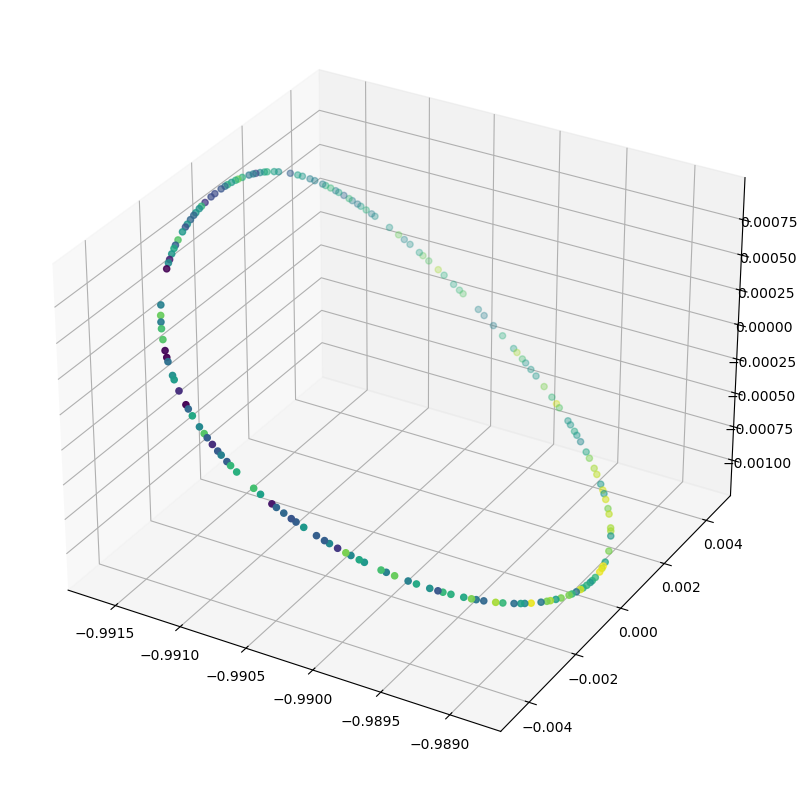

In [55]:
# Visualize shadowing orbit in position space, i.e. the points where correction
# maneuvers are performed.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(maneuvers['x'], maneuvers['y'], maneuvers['z'], c=maneuvers['dv_st'])
plt.show()

In [56]:
corr_matrix = maneuvers.corr()
corr_matrix["dv_st"].sort_values(ascending=False)

dv_st     1.000000
x         0.436177
y         0.319973
dx        0.318311
t         0.033776
dv_vel   -0.013326
dz       -0.315964
z        -0.412572
dy       -0.414459
Name: dv_st, dtype: float64

array([[<Axes: xlabel='t', ylabel='t'>, <Axes: xlabel='x', ylabel='t'>,
        <Axes: xlabel='y', ylabel='t'>,
        <Axes: xlabel='dv_vel', ylabel='t'>,
        <Axes: xlabel='dv_st', ylabel='t'>],
       [<Axes: xlabel='t', ylabel='x'>, <Axes: xlabel='x', ylabel='x'>,
        <Axes: xlabel='y', ylabel='x'>,
        <Axes: xlabel='dv_vel', ylabel='x'>,
        <Axes: xlabel='dv_st', ylabel='x'>],
       [<Axes: xlabel='t', ylabel='y'>, <Axes: xlabel='x', ylabel='y'>,
        <Axes: xlabel='y', ylabel='y'>,
        <Axes: xlabel='dv_vel', ylabel='y'>,
        <Axes: xlabel='dv_st', ylabel='y'>],
       [<Axes: xlabel='t', ylabel='dv_vel'>,
        <Axes: xlabel='x', ylabel='dv_vel'>,
        <Axes: xlabel='y', ylabel='dv_vel'>,
        <Axes: xlabel='dv_vel', ylabel='dv_vel'>,
        <Axes: xlabel='dv_st', ylabel='dv_vel'>],
       [<Axes: xlabel='t', ylabel='dv_st'>,
        <Axes: xlabel='x', ylabel='dv_st'>,
        <Axes: xlabel='y', ylabel='dv_st'>,
        <Axes: xlabel='dv_v

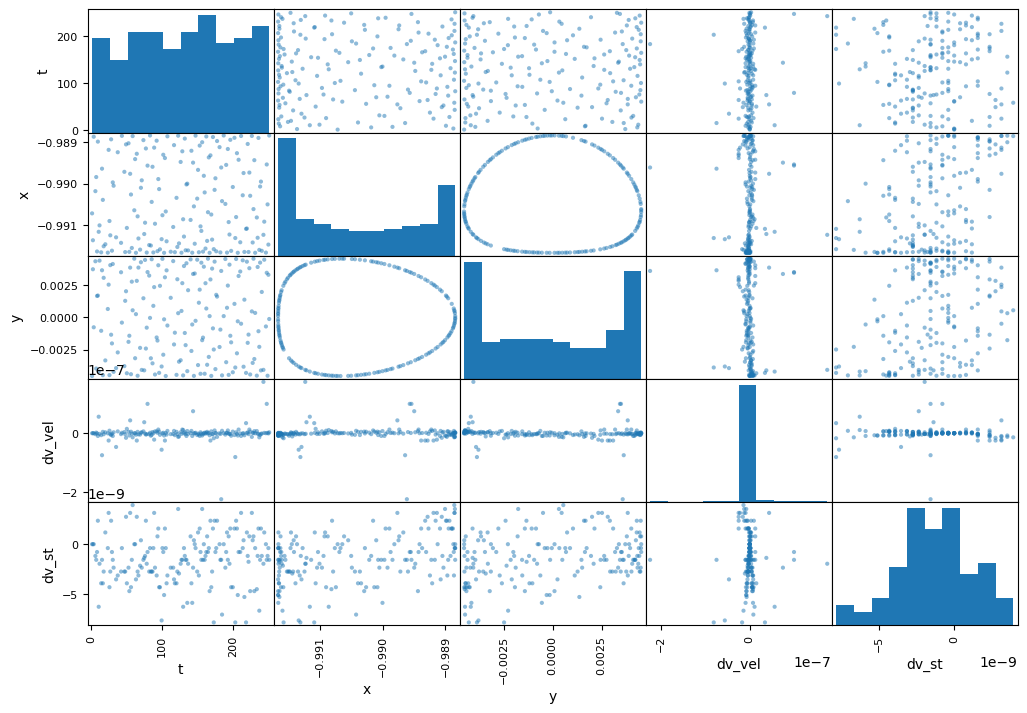

In [58]:
from pandas.plotting import scatter_matrix
attributes = ["t", "x", "y", "dv_vel", "dv_st"]
scatter_matrix(maneuvers[attributes], figsize=(12, 8))

Try adding new attribute "angle" = angle in the periodic orbit, which is essentially time/period.

In [64]:
import math
maneuvers["angle"]=maneuvers["t"].apply(lambda x: math.fmod(x, 0.3059226605957322E+01))
corr_matrix = maneuvers.corr()
corr_matrix["dv_st"].sort_values(ascending=False)

dv_st     1.000000
x         0.436177
y         0.319973
dx        0.318311
t         0.033776
dv_vel   -0.013326
angle    -0.142350
dz       -0.315964
z        -0.412572
dy       -0.414459
Name: dv_st, dtype: float64

array([[<Axes: xlabel='angle', ylabel='angle'>,
        <Axes: xlabel='dv_vel', ylabel='angle'>,
        <Axes: xlabel='dv_st', ylabel='angle'>],
       [<Axes: xlabel='angle', ylabel='dv_vel'>,
        <Axes: xlabel='dv_vel', ylabel='dv_vel'>,
        <Axes: xlabel='dv_st', ylabel='dv_vel'>],
       [<Axes: xlabel='angle', ylabel='dv_st'>,
        <Axes: xlabel='dv_vel', ylabel='dv_st'>,
        <Axes: xlabel='dv_st', ylabel='dv_st'>]], dtype=object)

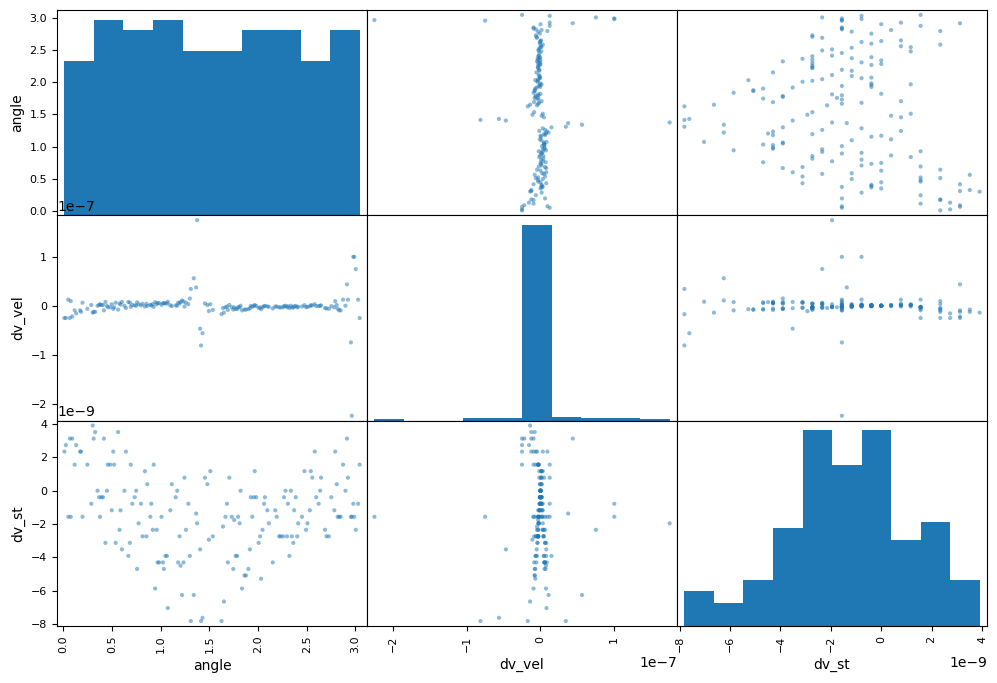

In [65]:
attributes = ["angle", "dv_vel", "dv_st"]
scatter_matrix(maneuvers[attributes], figsize=(12, 8))

Notice that angle and dv_st are not correlated, but they are nonlinearly related ("V" shape) !